### Linear Kalman Filter
##### In this example, we're simulating the position measurements of a moving object (in one dimension) and using a Kalman filter to estimate its position and velocity. The Kalman filter algorithm consists of two steps: prediction and update. In the prediction step, we use the state transition matrix to predict the next state of the system, and in the update step, we use the measurement matrix to correct the predicted state based on the latest measurement. The Kalman filter also includes two covariance matrices: the process noise covariance matrix, which models the uncertainty in the state transition, and the measurement noise covariance matrix, which models the uncertainty in the measurement.

In [1]:
import numpy as np

# Define the initial state of the system
x = np.array([[0.0], [0.0]])  # position and velocity
P = np.array([[1.0, 0.0], [0.0, 1.0]])  # initial covariance matrix

# Define the state transition matrix (assuming constant velocity)
dt = 1.0  # time step
A = np.array([[1.0, dt], [0.0, 1.0]])

# Define the measurement matrix (only position is measured)
H = np.array([[1.0, 0.0]])

# Define the measurement noise covariance matrix
R = np.array([[1.0]])

# Define the process noise covariance matrix
Q = np.array([[0.01, 0.0], [0.0, 0.01]])

# Define the control input (no external forces acting on the system)
u = np.array([[0.0], [0.0]])

# Define the measurement vector (simulated position measurements)
pos_meas = np.array([[1.2], [1.8], [2.5], [3.1], [3.9], [4.5]])

# Create an empty list to store the filtered state estimates
filtered_states = []

# Implement the Kalman filter algorithm
for z in pos_meas:
    # Prediction step
    x = np.dot(A, x) + np.dot(u, dt)
    P = np.dot(np.dot(A, P), A.T) + Q

    # Update step
    y = z - np.dot(H, x)
    S = np.dot(np.dot(H, P), H.T) + R
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S))
    x = x + np.dot(K, y)
    P = np.dot((np.eye(2) - np.dot(K, H)), P)

    # Save the filtered state estimate
    filtered_states.append(x)

# Print the filtered state estimates
print(filtered_states)


[array([[0.8013289],
       [0.3986711]]), array([[1.6013245 ],
       [0.59933335]]), array([[2.3890397 ],
       [0.67527787]]), array([[3.08470586],
       [0.68200813]]), array([[3.83567156],
       [0.70143299]]), array([[4.51954741],
       [0.69703328]])]


##### The below script generates some input and output data for a system with a sinusoidal input and a 2D state consisting of position and velocity. The Kalman filter estimates the state from the noisy measurements and plots the true and estimated states over time. The resulting plot should show the true position and velocity as well as the measured position and the estimated position based on the Kalman filter.

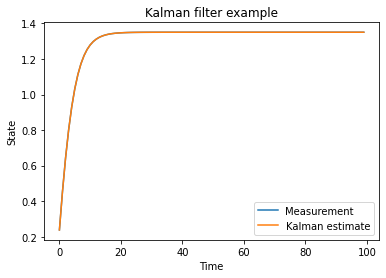

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system matrices
A = np.array([[1]])
B = np.array([0.5])
C = np.array([[1]])
D = np.array([0])

# Define the system noise and measurement noise
Q = np.array([[0.1]])
R = np.array([[1]])

# Define the initial state estimate and error covariance
x_hat = np.array([[0]])
P = np.array([[1]])

# Define the input signal and time vector
u = np.ones((100,))
t = np.arange(100)

# Simulate the system
x = np.zeros((100,))
y = np.zeros((100,))
for i in range(len(t)):
    # Predict
    x_hat_minus = A * x_hat + B * u[i]
    P_minus = A * P * A.T + Q

    # Update
    K = P_minus * C.T @ np.linalg.inv(C * P_minus * C.T + R)
    x_hat = x_hat_minus + K * (y[i] - C * x_hat_minus)
    P = (np.eye(1) - K * C) * P_minus

    # Save results
    x[i] = x_hat
    y[i] = C * x_hat + D * u[i]

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, y, label='Measurement')
ax.plot(t, x, label='Kalman estimate')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('State')
ax.set_title('Kalman filter example')
plt.show()


In [ ]:
from google.colab import drive

!cp example.txt /content/drive/MyDrive